In [2]:
import json
import os
import matplotlib.pyplot as plt  
import numpy as np

# 1 Comparison between x264 & x265

In [12]:
def encoder(source_video_file,codec_model):
    #example video.y4m
    #seperate filename(video) and fileext(.yvm)
    filename,fileext = os.path.splitext(source_video_file)
    #(example)./ffmpeg -i ./source-video/bus_cif.y4m -c:v libx264 ./encode-video/libx264/bus_cif_libx264.mp4
    input_command = './ffmpeg -i ./source-video/'
    output_directory = ' ./encode-video/'+ codec_model
    output_filename = '/' + filename + '_' +codec_model+ '.mp4'
    command = input_command + source_video_file + ' -c:v ' + codec_model + output_directory + output_filename
    #print(command)
    os.system(command)
    

In [4]:
#using x264 and x265 encoding the source video
source_video = os.listdir('./source-video')

for file in source_video:
    encoder(file,'libx264')
    encoder(file,'libx265')

In [6]:
# Get encoded video quality (including vmaf, ssim, psnr) by ffmpeg and encoded video formant by ffprobe
# After run this function, you can get two json file about video quality and video format
def getVmaf(source_video_file, codec_model):
    filename,fileext = os.path.splitext(source_video_file)
    #get video quality
    #./ffmpeg -i ./encode-video/libx264/bus_cif_libx264.mp4 -i ./source-video/bus_cif.y4m -lavfi libvmaf="model_path=./model/vmaf_v0.6.1.pkl: psnr=1:ms_ssim=1:ssim=1:log_fmt=json:log_path= ./vmaf/bus_cif_libx264_vmaf.json" -f null -
    command_vmaf = './ffmpeg -i ./encode-video/'+ codec_model +'/'+ filename + '_' + codec_model +'.mp4' +' -i ./source-video/' + source_video_file + ' -lavfi libvmaf="model_path=./model/vmaf_v0.6.1.pkl: psnr=1:ms_ssim=1:ssim=1:log_fmt=json:log_path= ./vmaf/' + filename + '_' + codec_model + '_vmaf.json" -f null -'
    
    #get encoded video format (file size and )
    #./ffprobe -v quiet -print_format json -show_format ./encode-video/libx264/bus_cif_libx264.mp4 >> ./video-format/bus_cif_libx264_format.json
    command_format = './ffprobe -v quiet -print_format json -show_format ./encode-video/' + codec_model + '/' + filename + '_' + codec_model + '.mp4 >> ./video-format/'+ filename + '_' + codec_model +'_format.json'
    
    print(command_vmaf)
    print(command_format)
    os.system(command_vmaf)
    os.system(command_format)
    

In [3]:
source_video = os.listdir('./source-video')
print(source_video)

['LakeDuck.y4m', 'ParkJoy.y4m', 'CSGO.y4m', 'WestWind.y4m', 'HouseBurn.y4m']


In [9]:
#encoding all source videos through libx264 & libx265
source_video = os.listdir('./source-video')
for file in source_video:
    getVmaf(file,'libx264')
    getVmaf(file,'libx265')

./ffmpeg -i ./encode-video/libx264/LakeDuck_libx264.mp4 -i ./source-video/LakeDuck.y4m -lavfi libvmaf="model_path=./model/vmaf_v0.6.1.pkl: psnr=1:ms_ssim=1:ssim=1:log_fmt=json:log_path= ./vmaf/LakeDuck_libx264_vmaf.json" -f null -
./ffprobe -v quiet -print_format json -show_format ./encode-video/libx264/LakeDuck_libx264.mp4 >> ./video-format/LakeDuck_libx264_format.json
./ffmpeg -i ./encode-video/libx265/LakeDuck_libx265.mp4 -i ./source-video/LakeDuck.y4m -lavfi libvmaf="model_path=./model/vmaf_v0.6.1.pkl: psnr=1:ms_ssim=1:ssim=1:log_fmt=json:log_path= ./vmaf/LakeDuck_libx265_vmaf.json" -f null -
./ffprobe -v quiet -print_format json -show_format ./encode-video/libx265/LakeDuck_libx265.mp4 >> ./video-format/LakeDuck_libx265_format.json
./ffmpeg -i ./encode-video/libx264/ParkJoy_libx264.mp4 -i ./source-video/ParkJoy.y4m -lavfi libvmaf="model_path=./model/vmaf_v0.6.1.pkl: psnr=1:ms_ssim=1:ssim=1:log_fmt=json:log_path= ./vmaf/ParkJoy_libx264_vmaf.json" -f null -
./ffprobe -v quiet -print_

In [7]:
#it can check video quality by related json file
#x264——vmaf
with open("./vmaf/bus_cif_libx264_vmaf.json", 'r') as f:
    temp = json.loads(f.read())
    print(temp['VMAF score'])
    #print(temp['ExecFps'])
    #print(temp['PSNR score'])
    #print(temp['SSIM score'])
    #print(temp['MS-SSIM score'])  
    
#x265——vmaf    
with open("./vmaf/bus_cif_libx265_vmaf.json", 'r') as f:
    temp = json.loads(f.read())
    print(temp['VMAF score'])

99.78640117012743
97.35027670386803


In [8]:
# it can get bit rate and file-size from related json file
#x264
with open("./video-format/bus_cif_libx264_format.json", 'r') as f:
    test = json.loads(f.read())
    print(test['format']['bit_rate'])
    #print(test['format']['size'])
    
#x265
with open("./video-format/bus_cif_libx265_format.json", 'r') as f:
    test = json.loads(f.read())
    print(test['format']['bit_rate'])

776504
499182


# 2 Comparison of Preset

In [ ]:
# it can change parameters (preset,ctu,&qp) through below cmaand
#./ffmpeg -i ./source-video/bus_cif.y4m -c:v libx264 -preset veryslow -crf 18 test.mp4

#./ffmpeg -i ./source-video/bus_cif.y4m -c:v libx265 -x265-params "ctu=16:qp=0" test_16qp.mp4;  


In [ ]:
#Maximum coding unit(height/width)  (64,32,16)       -ctu
#Quad tree TU log2 min/max          (2,3,4,5)        -max-tu-size
#Quantization parameter             (0-51)           -crf/ -qp
#partition depth(intra)             (1,2,3,4)        -tu-intra-depth

In [2]:
def encoder_preset(source_video_file,preset):
    filename,fileext = os.path.splitext(source_video_file)
    #command example: ./ffmpeg -i ./source-video/bus_cif.y4m -c:v libx265 -preset veryslow ./encode-video/preset/test.mp4
    input_command = './ffmpeg -i ./source-video/'
    output_directory = ' ./encode-video/'+ 'preset'
    output_filename = '/' + filename + '_' +preset+ '.mp4'
    command = input_command + source_video_file + ' -c:v ' + 'libx265' + ' -preset ' + preset + output_directory + output_filename
    print(command)
    os.system(command)
    

The presets adjust encoder parameters as shown in the following table. Any parameters below that are specified in your command-line will be changed from the value specified by the preset.

1. superfast
2. veryfast
3. faster
4. fast
5. medium (default)
6. slow
7. slower
8. veryslow

In [6]:
preset_set = ['slower','medium','fast','faster','superfast','ultrafast']

In [4]:
source_video = os.listdir('./source-video')

for file in source_video:
    for preset in preset_set:
        encoder_preset(file, preset)

./ffmpeg -i ./source-video/LakeDuck.y4m -c:v libx265 -preset slower ./encode-video/preset/LakeDuck_slower.mp4
./ffmpeg -i ./source-video/LakeDuck.y4m -c:v libx265 -preset medium ./encode-video/preset/LakeDuck_medium.mp4
./ffmpeg -i ./source-video/LakeDuck.y4m -c:v libx265 -preset fast ./encode-video/preset/LakeDuck_fast.mp4
./ffmpeg -i ./source-video/LakeDuck.y4m -c:v libx265 -preset faster ./encode-video/preset/LakeDuck_faster.mp4
./ffmpeg -i ./source-video/LakeDuck.y4m -c:v libx265 -preset superfast ./encode-video/preset/LakeDuck_superfast.mp4
./ffmpeg -i ./source-video/LakeDuck.y4m -c:v libx265 -preset ultrafast ./encode-video/preset/LakeDuck_ultrafast.mp4
./ffmpeg -i ./source-video/ParkJoy.y4m -c:v libx265 -preset slower ./encode-video/preset/ParkJoy_slower.mp4
./ffmpeg -i ./source-video/ParkJoy.y4m -c:v libx265 -preset medium ./encode-video/preset/ParkJoy_medium.mp4
./ffmpeg -i ./source-video/ParkJoy.y4m -c:v libx265 -preset fast ./encode-video/preset/ParkJoy_fast.mp4
./ffmpeg -i 

In [4]:
def getVmaf_para(source_video_file, para_file,preset):
    filename,fileext = os.path.splitext(source_video_file)
    #./ffmpeg -i ./encode-video/libx264/bus_cif_libx264.mp4 -i ./source-video/bus_cif.y4m -lavfi libvmaf="model_path=./model/vmaf_v0.6.1.pkl: psnr=1:ms_ssim=1:ssim=1:log_fmt=json:log_path= ./vmaf/bus_cif_libx264_vmaf.json" -f null -
    command_vmaf = './ffmpeg -i ./encode-video/'+ para_file +'/'+ filename + '_' + preset +'.mp4' +' -i ./source-video/' + source_video_file + ' -lavfi libvmaf="model_path=./model/vmaf_v0.6.1.pkl: psnr=1:ms_ssim=1:ssim=1:log_fmt=json:log_path= ./vmaf/' + filename + '_' + preset + '_vmaf.json" -f null -'
    
    #./ffprobe -v quiet -print_format json -show_format ./encode-video/libx264/bus_cif_libx264.mp4 >> ./video-format/bus_cif_libx264_format.json
    command_format = './ffprobe -v quiet -print_format json -show_format ./encode-video/' + para_file + '/' + filename + '_' + preset + '.mp4 >> ./video-format/'+ filename + '_' + preset +'_format.json'
    
    print(command_vmaf)
    print(command_format)
    os.system(command_vmaf)
    os.system(command_format)
    

In [4]:
# getVmaf_para('HouseBurn.y4m','preset','slow')

In [10]:
source_video = os.listdir('./source-video')

for file in source_video:
    for preset in preset_set:
        getVmaf_para(file,'preset', preset)

./ffmpeg -i ./encode-video/preset/LakeDuck_slower.mp4 -i ./source-video/LakeDuck.y4m -lavfi libvmaf="model_path=./model/vmaf_v0.6.1.pkl: psnr=1:ms_ssim=1:ssim=1:log_fmt=json:log_path= ./vmaf/LakeDuck_slower_vmaf.json" -f null -
./ffprobe -v quiet -print_format json -show_format ./encode-video/preset/LakeDuck_slower.mp4 >> ./video-format/LakeDuck_slower_format.json
./ffmpeg -i ./encode-video/preset/LakeDuck_medium.mp4 -i ./source-video/LakeDuck.y4m -lavfi libvmaf="model_path=./model/vmaf_v0.6.1.pkl: psnr=1:ms_ssim=1:ssim=1:log_fmt=json:log_path= ./vmaf/LakeDuck_medium_vmaf.json" -f null -
./ffprobe -v quiet -print_format json -show_format ./encode-video/preset/LakeDuck_medium.mp4 >> ./video-format/LakeDuck_medium_format.json
./ffmpeg -i ./encode-video/preset/LakeDuck_fast.mp4 -i ./source-video/LakeDuck.y4m -lavfi libvmaf="model_path=./model/vmaf_v0.6.1.pkl: psnr=1:ms_ssim=1:ssim=1:log_fmt=json:log_path= ./vmaf/LakeDuck_fast_vmaf.json" -f null -
./ffprobe -v quiet -print_format json -sho

./ffmpeg -i ./encode-video/preset/WestWind_ultrafast.mp4 -i ./source-video/WestWind.y4m -lavfi libvmaf="model_path=./model/vmaf_v0.6.1.pkl: psnr=1:ms_ssim=1:ssim=1:log_fmt=json:log_path= ./vmaf/WestWind_ultrafast_vmaf.json" -f null -
./ffprobe -v quiet -print_format json -show_format ./encode-video/preset/WestWind_ultrafast.mp4 >> ./video-format/WestWind_ultrafast_format.json
./ffmpeg -i ./encode-video/preset/HouseBurn_slower.mp4 -i ./source-video/HouseBurn.y4m -lavfi libvmaf="model_path=./model/vmaf_v0.6.1.pkl: psnr=1:ms_ssim=1:ssim=1:log_fmt=json:log_path= ./vmaf/HouseBurn_slower_vmaf.json" -f null -
./ffprobe -v quiet -print_format json -show_format ./encode-video/preset/HouseBurn_slower.mp4 >> ./video-format/HouseBurn_slower_format.json
./ffmpeg -i ./encode-video/preset/HouseBurn_medium.mp4 -i ./source-video/HouseBurn.y4m -lavfi libvmaf="model_path=./model/vmaf_v0.6.1.pkl: psnr=1:ms_ssim=1:ssim=1:log_fmt=json:log_path= ./vmaf/HouseBurn_medium_vmaf.json" -f null -
./ffprobe -v quiet

# 3 Comparison of QP & MTU

In [2]:
def encoder_params(source_video_file,params,params_value):
    filename,fileext = os.path.splitext(source_video_file)
    #./ffmpeg -i ./source-video/bus_cif.y4m -c:v libx265 -x265-params "ctu=16:qp=0" test_16qp.mp4;  
    input_command = './ffmpeg -i ./source-video/'
    output_directory = ' ./encode-video/'+ params
    output_filename = '/' + filename + '_' +params_value+ '.mp4'
    command = input_command + source_video_file + ' -c:v ' + 'libx265' + ' -x265-params ' + '\"' + params_value + '\"'+ output_directory + output_filename
    print(command)
    os.system(command)
    

In [3]:
qp_set = ['qp=22','qp=27','qp=32','qp=37']

In [9]:
source_video = os.listdir('./source-video')

for file in source_video:
    for qp in qp_set:
        encoder_params(file,'qp',qp)

./ffmpeg -i ./source-video/LakeDuck.y4m -c:v libx265 -x265-params "qp=22" ./encode-video/qp/LakeDuck_qp=22.mp4
./ffmpeg -i ./source-video/LakeDuck.y4m -c:v libx265 -x265-params "qp=27" ./encode-video/qp/LakeDuck_qp=27.mp4
./ffmpeg -i ./source-video/LakeDuck.y4m -c:v libx265 -x265-params "qp=32" ./encode-video/qp/LakeDuck_qp=32.mp4
./ffmpeg -i ./source-video/LakeDuck.y4m -c:v libx265 -x265-params "qp=37" ./encode-video/qp/LakeDuck_qp=37.mp4
./ffmpeg -i ./source-video/ParkJoy.y4m -c:v libx265 -x265-params "qp=22" ./encode-video/qp/ParkJoy_qp=22.mp4
./ffmpeg -i ./source-video/ParkJoy.y4m -c:v libx265 -x265-params "qp=27" ./encode-video/qp/ParkJoy_qp=27.mp4
./ffmpeg -i ./source-video/ParkJoy.y4m -c:v libx265 -x265-params "qp=32" ./encode-video/qp/ParkJoy_qp=32.mp4
./ffmpeg -i ./source-video/ParkJoy.y4m -c:v libx265 -x265-params "qp=37" ./encode-video/qp/ParkJoy_qp=37.mp4
./ffmpeg -i ./source-video/CSGO.y4m -c:v libx265 -x265-params "qp=22" ./encode-video/qp/CSGO_qp=22.mp4
./ffmpeg -i ./sou

In [7]:
mtu_set = ['max-tu-size=32','max-tu-size=16','max-tu-size=8','max-tu-size=4']

In [4]:
source_video = os.listdir('./source-video')

for file in source_video:
    for mtu in mtu_set:
        encoder_params(file,'mtu',mtu)

./ffmpeg -i ./source-video/LakeDuck.y4m -c:v libx265 -x265-params "max-tu-size=32" ./encode-video/mtu/LakeDuck_max-tu-size=32.mp4
./ffmpeg -i ./source-video/LakeDuck.y4m -c:v libx265 -x265-params "max-tu-size=16" ./encode-video/mtu/LakeDuck_max-tu-size=16.mp4
./ffmpeg -i ./source-video/LakeDuck.y4m -c:v libx265 -x265-params "max-tu-size=8" ./encode-video/mtu/LakeDuck_max-tu-size=8.mp4
./ffmpeg -i ./source-video/LakeDuck.y4m -c:v libx265 -x265-params "max-tu-size=4" ./encode-video/mtu/LakeDuck_max-tu-size=4.mp4
./ffmpeg -i ./source-video/ParkJoy.y4m -c:v libx265 -x265-params "max-tu-size=32" ./encode-video/mtu/ParkJoy_max-tu-size=32.mp4
./ffmpeg -i ./source-video/ParkJoy.y4m -c:v libx265 -x265-params "max-tu-size=16" ./encode-video/mtu/ParkJoy_max-tu-size=16.mp4
./ffmpeg -i ./source-video/ParkJoy.y4m -c:v libx265 -x265-params "max-tu-size=8" ./encode-video/mtu/ParkJoy_max-tu-size=8.mp4
./ffmpeg -i ./source-video/ParkJoy.y4m -c:v libx265 -x265-params "max-tu-size=4" ./encode-video/mtu/Pa

In [ ]:
source_video = os.listdir('./source-video')

for file in source_video:
    for qp in qp_set:
        getVmaf_para(file,'qp', qp)

./ffmpeg -i ./encode-video/qp/LakeDuck_qp=22.mp4 -i ./source-video/LakeDuck.y4m -lavfi libvmaf="model_path=./model/vmaf_v0.6.1.pkl: psnr=1:ms_ssim=1:ssim=1:log_fmt=json:log_path= ./vmaf/LakeDuck_qp=22_vmaf.json" -f null -
./ffprobe -v quiet -print_format json -show_format ./encode-video/qp/LakeDuck_qp=22.mp4 >> ./video-format/LakeDuck_qp=22_format.json
./ffmpeg -i ./encode-video/qp/LakeDuck_qp=27.mp4 -i ./source-video/LakeDuck.y4m -lavfi libvmaf="model_path=./model/vmaf_v0.6.1.pkl: psnr=1:ms_ssim=1:ssim=1:log_fmt=json:log_path= ./vmaf/LakeDuck_qp=27_vmaf.json" -f null -
./ffprobe -v quiet -print_format json -show_format ./encode-video/qp/LakeDuck_qp=27.mp4 >> ./video-format/LakeDuck_qp=27_format.json
./ffmpeg -i ./encode-video/qp/LakeDuck_qp=32.mp4 -i ./source-video/LakeDuck.y4m -lavfi libvmaf="model_path=./model/vmaf_v0.6.1.pkl: psnr=1:ms_ssim=1:ssim=1:log_fmt=json:log_path= ./vmaf/LakeDuck_qp=32_vmaf.json" -f null -
./ffprobe -v quiet -print_format json -show_format ./encode-video/qp

In [8]:
source_video = os.listdir('./source-video')

for file in source_video:
    for mtu in mtu_set:
        getVmaf_para(file,'mtu',mtu)

./ffmpeg -i ./encode-video/mtu/LakeDuck_max-tu-size=32.mp4 -i ./source-video/LakeDuck.y4m -lavfi libvmaf="model_path=./model/vmaf_v0.6.1.pkl: psnr=1:ms_ssim=1:ssim=1:log_fmt=json:log_path= ./vmaf/LakeDuck_max-tu-size=32_vmaf.json" -f null -
./ffprobe -v quiet -print_format json -show_format ./encode-video/mtu/LakeDuck_max-tu-size=32.mp4 >> ./video-format/LakeDuck_max-tu-size=32_format.json
./ffmpeg -i ./encode-video/mtu/LakeDuck_max-tu-size=16.mp4 -i ./source-video/LakeDuck.y4m -lavfi libvmaf="model_path=./model/vmaf_v0.6.1.pkl: psnr=1:ms_ssim=1:ssim=1:log_fmt=json:log_path= ./vmaf/LakeDuck_max-tu-size=16_vmaf.json" -f null -
./ffprobe -v quiet -print_format json -show_format ./encode-video/mtu/LakeDuck_max-tu-size=16.mp4 >> ./video-format/LakeDuck_max-tu-size=16_format.json
./ffmpeg -i ./encode-video/mtu/LakeDuck_max-tu-size=8.mp4 -i ./source-video/LakeDuck.y4m -lavfi libvmaf="model_path=./model/vmaf_v0.6.1.pkl: psnr=1:ms_ssim=1:ssim=1:log_fmt=json:log_path= ./vmaf/LakeDuck_max-tu-siz

In [12]:
def histogram(values, xlabel, ylabel, title):
    plt.figure(figsize=(10, 10), dpi=80)

    # 包含每个柱子对应值的序列
   
    N = len(values)
    index = np.arange(N)
    width = 0.45
    p2 = plt.bar(index, values, width, label="num", color="#87CEFA")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.title(title)
    # 添加纵横轴的刻度
    plt.xticks(index, preset_set)
    # plt.yticks(np.arange(0, 10000, 10))
    # 添加图例
    plt.show()

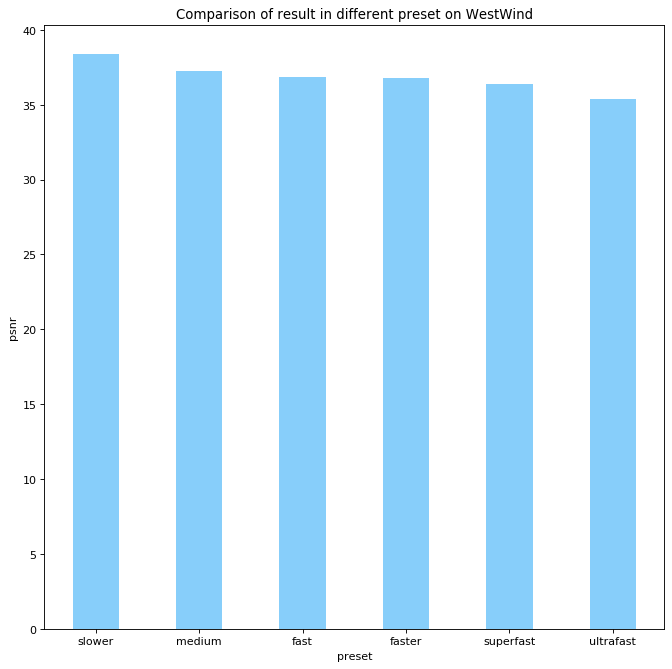

In [14]:
# you can collect values from json file as above described
#histogram((38.42,37.23,36.88,36.77,36.41,35.36),'preset','psnr','Comparison of result in different preset on WestWind')